In [29]:
%matplotlib inline
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import numpy as np
import _pickle
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
with open('pkls/zansa_12.pkl', 'rb') as f:
    df = _pickle.load(f)
with open('pkls/tsdiv_list.pkl', 'rb') as f:
    tsdiv_list = _pickle.load(f)

In [31]:
categories = {
    "布団類":"(?!座布団)布団|ふとん|ベッド|ベット|マットレス|パット",
    "絨毯類": "(?!マットレス)じゅうたん|カーペット|ジュータン|絨毯|マット|じゅーたん|敷物|ござ|ゴザ|敷",
    "鞄類": "かばん|バッグ|バック|リュック|鞄|カバン",
    "座布団": "座布団",
    "枕類": "枕|まくら|マクラ",
    "クッション類":"クッション|くっしょん|くしょん",
    "靴類":"靴|くつ|クツ|サンダル|スリッパ",
    "椅子類":"イス|いす|椅子|座椅子|座いす",
    "ダンボール類":"ダンボール|段ボール|だんぼーる",
    "傘類":"傘|かさ|カサ",
    "プラスチック類":"プラ",
    "発泡スチロール":"発泡|ハッポー|スチロール",
    "家電製品":"[電機]|ストーブ|テレビ|ビデオ|CD|DVD|コンロ",
    "不燃ゴミ": "不燃",
    "可燃ゴミ": "可燃|木",
    "紙類":"紙|雑誌|雑がみ|新聞",
    "その他":"その他|ゴミ|ごみ",
    "オムツ":'オムツ|おむつ',
    "ビン・缶・ペットボトル":'ビン|瓶|びん|缶|かん|カン|ペットボトル',
    "電球":'光|電球|ライト',
    "電池":'電池',
    "おもちゃ":'ぬいぐるみ|おもちゃ|オモチャ',
    "ガラス":'ガラス|がらす',
    "海グッズ":'ウェットスーツ|ボード',
    "ハンガー":'ハンガー|はんがー',
    "大型ゴミ":'大型',
    "資源ゴミ":'資源',
}

In [32]:
#result = total_categories[["mesh12", "category"]].sort_index()

In [33]:
total = []
for k, v in categories.items():
    total.append(df[df.text.str.contains(v)].copy())
    total[-1]["category"] = k
result = pd.concat(total)

In [34]:
data = result[["ts", "mesh12", "category"]].sort_index()

In [35]:
data.ts = pd.to_datetime(data.ts.dt.strftime('%Y-%m-%d'))

In [36]:
data = data.reset_index(drop=True)
data['count'] = 1

In [37]:
data

,ts,mesh12,category,count
0,2016-10-05,533903771,絨毯類,1
1,2016-10-05,533903673,絨毯類,1
2,2016-10-05,533903771,絨毯類,1
3,2016-10-05,533903673,絨毯類,1
4,2016-10-05,533903673,クッション類,1
5,2016-10-05,533903771,絨毯類,1
6,2016-10-05,533903771,絨毯類,1
7,2016-10-06,533903752,布団類,1
8,2016-10-06,533903752,枕類,1
9,2016-10-12,533903752,絨毯類,1


In [38]:
time_index = []
mesh_index = list(set(data.mesh12))
cat_index = list(categories.keys())
X = data.groupby([pd.Grouper(key='ts', freq='7d'), "mesh12", "category"]).sum()
X

count
ts         mesh12    category          
2016-10-05 533903673 クッション類           1
                     絨毯類              2
           533903752 布団類              1
                     枕類               1
           533903771 絨毯類              4
2016-10-12 533903063 靴類               1
           533903683 その他              1
                     資源ゴミ             1
           533903752 紙類               1
                     絨毯類              1
           533903773 その他              1
                     大型ゴミ             1
                     布団類              1
           533903781 その他              1
                     資源ゴミ             1
           533903962 その他              2
                     不燃ゴミ             1
                     資源ゴミ             1
           533903971 その他              1
                     不燃ゴミ             1
                     大型ゴミ             1
                     絨毯類              1
           533913072 枕類               1
                     絨毯類              1
           533913073 傘類               1
                     布団類              1
                     鞄類               1
2016-10-19 533903074 その他              1
                     大型ゴミ             1
                     布団類              1
...                                 ...
2017-11-29 533903672 布団類              2
                     座布団              2
                     枕類               1
                     発泡スチロール          1
           533903674 布団類              1
                     発泡スチロール          1
           533903731 家電製品             1
           533903751 その他              1
                     不燃ゴミ             1
           533903772 絨毯類              1
           533903831 プラスチック類          1
           533903961 その他              1
                     ビン・缶・ペットボトル      1
                     プラスチック類          1
           533904002 絨毯類              1
           533904003 布団類              1
           533904101 絨毯類              1
2017-12-06 523973862 布団類              1
           523973864 布団類              1
           523973871 布団類              1
                     絨毯類              1
           523973872 絨毯類              1
           523973881 その他              1
                     不燃ゴミ             1
           523973962 枕類               1
           523973964 枕類               1
                     発泡スチロール          1
                     絨毯類              1
           523973993 布団類              1
           533903072 布団類              1

[2099 rows x 1 columns]

In [39]:
with open('pkls/time_index.pkl', 'wb') as f:
    _pickle.dump(time_index, f)
with open('pkls/mesh_index.pkl', 'wb') as f:
    _pickle.dump(mesh_index, f)
with open('pkls/cat_index.pkl', 'wb') as f:
    _pickle.dump(cat_index, f)

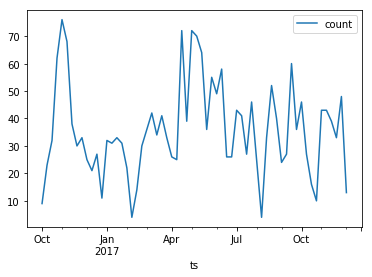

In [40]:
y = X.groupby('ts').sum()

ax = y.plot(rot=0)
fig = ax.get_figure()
fig.savefig('tmp_img/ts_zansa.eps')
plt.show()

In [41]:
y1 = X.groupby('category').sum()
y1.sum()

count    2232
dtype: int64

In [42]:
time_index = tsdiv_list

In [43]:
input_size = len(time_index),len(mesh_index),len(cat_index)
print(input_size)

(62, 215, 27)


In [44]:
tensor = []
time_index = []
for (t, m, c), v in X.iterrows():
    if not t in time_index:
        time_index.append(t)
    tensor.append([time_index.index(t), mesh_index.index(m), cat_index.index(c), list(v)[0]])

In [45]:
tensor = np.array(tensor)

In [46]:
class CP_TF(nn.Module):
    def __init__(self, input_shape, num_components=1):
        super(CP_TF, self).__init__()
        self.num_components = num_components
        self.U = nn.Embedding(num_components, input_shape[0], sparse=False)
        self.V = nn.Embedding(num_components, input_shape[1], sparse=False)
        self.W = nn.Embedding(num_components, input_shape[2], sparse=False)
        self.U.weight.data.normal_(0, 0.01)
        self.V.weight.data.normal_(0, 0.01)
        self.W.weight.data.normal_(0, 0.01)
        
        self.input_shape = input_shape
        
    def non_negative(self):
        self.U.weight.data = torch.clamp(self.U.weight.data, min=0)
        self.V.weight.data = torch.clamp(self.V.weight.data, min=0)
        self.W.weight.data = torch.clamp(self.W.weight.data, min=0)
        
    def forward(self):
        output = Variable(torch.zeros(self.input_shape))
        for i in range(self.num_components):
            output += self.forward_one_comp(self.U.weight[i], self.V.weight[i], self.W.weight[i])
        return output
    
    def forward_one_comp(self, u, v, w):
        UV = torch.ger(u, v)
        UV = UV.unsqueeze(-1).repeat(1, 1, self.input_shape[2])
        W = w.unsqueeze(0).unsqueeze(1).repeat(self.input_shape[0], self.input_shape[1], 1)
        output = UV * W
        return output

In [47]:
def mse_loss(gt, pr):
    t, m, c, v = gt
    predict_value = pr[t, m, c]
    loss = torch.pow(predict_value - v, 2)
    return loss

In [55]:
R = 1
model = CP_TF(input_size, R)
optimizer = optim.Adagrad(model.parameters(), lr=0.3, lr_decay=0, weight_decay=0)
epochs = 2
for epoch in range(epochs):
    loss = 0
    optimizer.zero_grad()
    for x in tensor:
        x = Variable(torch.from_numpy(x))
        predict = model()
        loss += mse_loss(x, predict)
        
    loss.backward()
    optimizer.step()
    model.non_negative()
    print('{}: {}'.format(epoch, loss))
print('R={}: {}'.format(R, loss))

0: 2540.0
1: 2528.452880859375
R=1: 2528.452880859375


In [56]:
U = np.array(model.U.weight.data)
print(U.shape)
print(U)

(1, 62)
[[0.30533257 0.29999974 0.29999995 0.6049849  0.3        0.616524
  0.29999977 0.29999998 0.5908762  0.60592365 0.59489024 0.6022233
  0.6019914  0.6168814  0.2999998  0.5822122  0.29998776 0.6005976
  0.5964979  0.6047904  0.61197925 0.3        0.5978441  0.6108893
  0.58682644 0.56796265 0.29999983 0.5959989  0.2999977  0.6013351
  0.6099074  0.6156665  0.29999965 0.58993936 0.2999997  0.6007372
  0.3        0.5988972  0.6131588  0.29999936 0.2999999  0.2999999
  0.6014233  0.59780276 0.29999822 0.59098667 0.29999772 0.6032058
  0.29999882 0.29999995 0.60651076 0.59563816 0.5873644  0.5884644
  0.59437764 0.6060209  0.58691657 0.59389305 0.29999927 0.58649594
  0.59408176 0.5904106 ]]
